In [3]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)


In [ ]:
pip install --upgrade pip setuptools wheel


In [3]:
pip install opencv-contrib-python==4.5.5.64


   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/42.2 MB 25.9 MB/s eta 0:00:02
   ---------- ----------------------------- 11.0/42.2 MB 28.7 MB/s eta 0:00:02
   -------------- ------------------------- 15.2/42.2 MB 26.6 MB/s eta 0:00:02
   ---------------- ----------------------- 17.6/42.2 MB 22.6 MB/s eta 0:00:02
   -------------------- ------------------- 21.8/42.2 MB 21.8 MB/s eta 0:00:01
   ------------------------ --------------- 26.0/42.2 MB 21.4 MB/s eta 0:00:01
   ---------------------------- ----------- 29.9/42.2 MB 21.3 MB/s eta 0:00:01
   -------------------------------- ------- 34.3/42.2 MB 21.2 MB/s eta 0:00:01
   ---------------------------------- ----- 37.0/42.2 MB 21.2 MB/s eta 0:00:01
   ------------------------------------- -- 40.1/42.2 MB 19.9 MB/s eta 0:00:01
   ---------------------------------------  42.2/42.2 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 42.2/42.2 MB 18.8 

In [ ]:
import numpy as np 
import pandas as pd 
import cv2, os, re
import matplotlib.pyplot as plt
import imutils

from tqdm import tqdm
from imutils.object_detection import non_max_suppression

from tensorflow.keras.models import load_model

In [1]:
def find_regions(image, method):

    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    if method == 'fast':
        ss.switchToSelectiveSearchFast()
    else:
        ss.switchToSelectiveSearchQuality()
    rects = ss.process()
    boxes = []
    for (x,y,w,h) in rects:
        boxes.append([x,y,w,h])
        pass
    return boxes
    pass

In [3]:
scene_path = 'Dataset/scenes/scenes'

def load_scenes():
    
    scenes = []
    dirfiles = os.listdir(scene_path)
    dirfiles = sorted(dirfiles)
    for file in dirfiles:
        
        print(os.path.join(scene_path, file))
        scene = cv2.imread(os.path.join(scene_path, file))
        scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
        scenes.append(scene)
        pass
    
    return scenes
    pass

In [9]:
import cv2
import numpy as np

scenes = load_scenes()


Dataset/scenes/scenes\lb_1.png
Dataset/scenes/scenes\lb_2.png
Dataset/scenes/scenes\lb_3.png
Dataset/scenes/scenes\lb_4.png
Dataset/scenes/scenes\sfbay_1.png
Dataset/scenes/scenes\sfbay_2.png
Dataset/scenes/scenes\sfbay_3.png
Dataset/scenes/scenes\sfbay_4.png


In [11]:
%%time
method = "fast"

boxes = []

for scene in scenes:
    
    box_in_scene = find_regions(scene, method)
    boxes.append(box_in_scene)
    pass

CPU times: total: 9min 28s
Wall time: 6min 44s


In [15]:
from tensorflow.keras.models import load_model

model = load_model('models/ship-model.h5')

model.summary()

Model: "Feature_Extraction_and_FC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 58, 58, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 29, 29, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv1 (BatchNormalization)   │ (None, 29, 29, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2A_branch2a (Conv2D)       │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2A_branch2a                  │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3A_branch2a (Conv2D)       │ (None, 7, 7, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3A_branch2a                  │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4A_branch2a (Conv2D)       │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_4A_branch2a                  │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,32

 Total params: 62,532 (244.27 KB)

 Trainable params: 62,242 (243.13 KB)

 Non-trainable params: 288 (1.12 KB)

 Optimizer params: 2 (12.00 B)

In [54]:
%%time

images = []

for i, scene in tqdm(enumerate(scenes)):
    (H, W) = scene.shape[:2]
    rois, locs = [], []  # Moved inside the loop

    for (x, y, w, h) in boxes[i]:
        # Skip boxes that are too small (less than 1% of image size)
        if w / float(W) < 0.01 or h / float(H) < 0.01:
            continue

        # Crop the region of interest
        roi = scene[y:y+h, x:x+w]

        # Convert color to RGB and resize to model input
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        roi = cv2.resize(roi, (48, 48))

        rois.append(roi)
        locs.append((x, y, x+w, y+h))

    # Skip if no ROIs were collected
    if not rois:
        images.append(scene.copy())
        continue

    # Make predictions
    input_rois = np.array(rois, dtype=np.float32) / 255.0  # Normalize if model expects that
    probs = model.predict(input_rois)

    # Optional debug: print predicted classes and counts
    preds = np.argmax(probs, axis=1)
    print("Predicted labels:", np.unique(preds, return_counts=True))

    # Draw predictions on the original image
    img = scene.copy()
    for j, prob in enumerate(probs):
        label = np.argmax(prob)
        confidence = prob[label]

        if label == 1 and confidence >= 0.8:  # Assuming 1 means "ship"
            (startX, startY, endX, endY) = locs[j]
            cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(img, f'{confidence:.2f}', (startX, startY - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    images.append(img)


0it [00:00, ?it/s]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


1it [00:00,  1.31it/s]

Predicted labels: (array([0, 1], dtype=int64), array([4105,   81], dtype=int64))
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted labels: (array([0, 1], dtype=int64), array([1469,  147], dtype=int64))


2it [00:01,  2.01it/s]

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


3it [00:02,  1.14it/s]

Predicted labels: (array([0, 1], dtype=int64), array([6878,  193], dtype=int64))
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted labels: (array([0, 1], dtype=int64), array([5077,  102], dtype=int64))


4it [00:03,  1.11it/s]

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


5it [00:04,  1.04s/it]

Predicted labels: (array([0, 1], dtype=int64), array([6663,  129], dtype=int64))
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted labels: (array([0, 1], dtype=int64), array([4937,   86], dtype=int64))


6it [00:05,  1.00it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


7it [00:06,  1.16it/s]

Predicted labels: (array([0, 1], dtype=int64), array([3608,  159], dtype=int64))
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


8it [00:06,  1.21it/s]

Predicted labels: (array([0, 1], dtype=int64), array([2830,  106], dtype=int64))
CPU times: total: 24.1 s
Wall time: 6.62 s


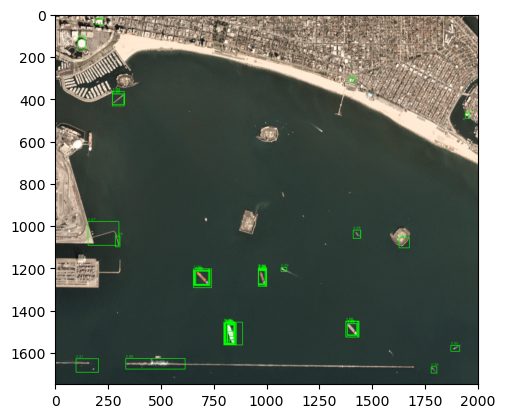

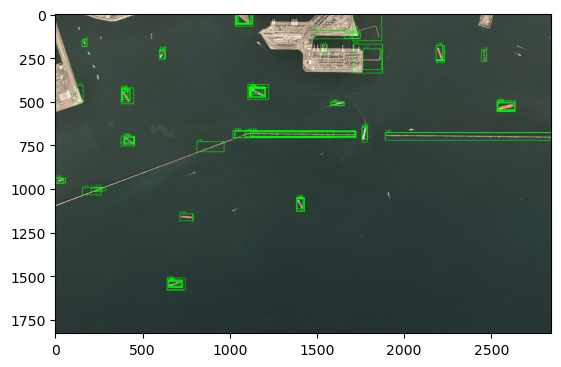

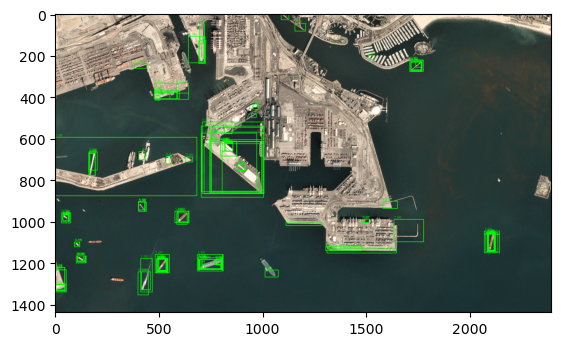

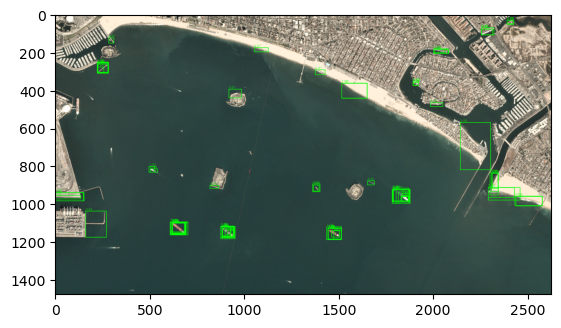

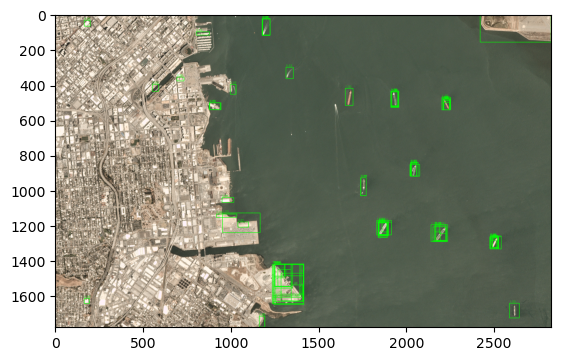

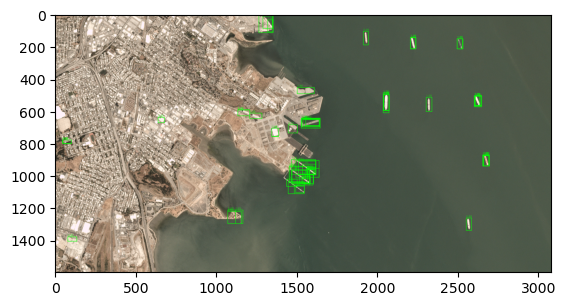

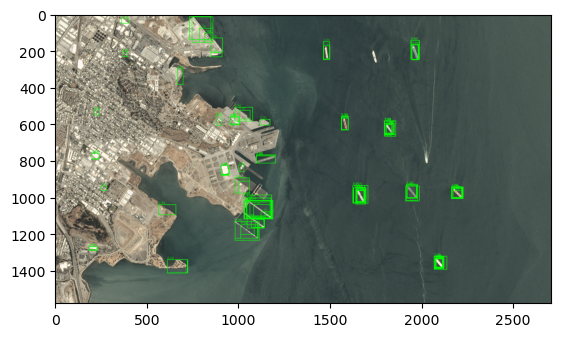

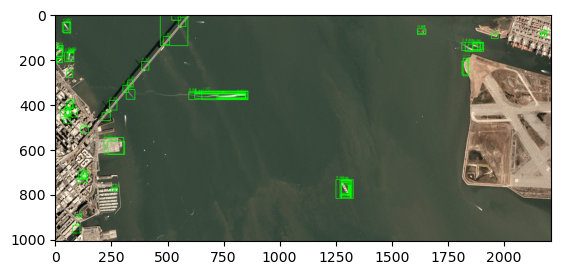

In [56]:
import matplotlib.pyplot as plt

for image in images:
    
    plt.imshow(image)
    plt.show();